## Linear Regression in Python

### By Thomas Oswald

#### Spring 2020, Data 4319

Linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables. In this notebook, we will look at one explanatory variable so this is a case of a simple linear regression between measurements from the Iris data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#### Preview of the IRIS data set

In [2]:
data = pd.read_csv('iris_data.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Create a subset for a single species
data = data.loc[data['Species'] == "versicolor"]
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


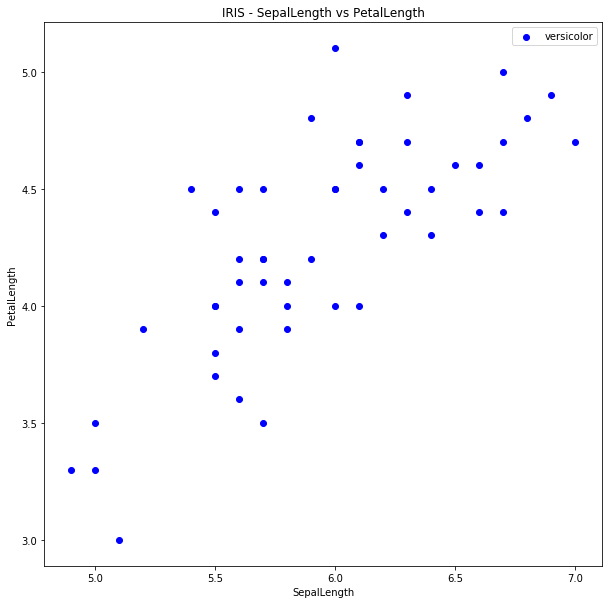

In [4]:
# Create more subsets for specific iris measurements
x = data.loc[:, 'SepalLength'].values
y = data.loc[:, 'PetalLength'].values

# Scatter plot the measurements
fig = plt.figure(figsize=(10,10))

plt.scatter(x,
            y,
            color = "b",
            label = 'versicolor')

plt.title('IRIS - SepalLength vs PetalLength')
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()

In [5]:
# first we will create a training data set and a testing data set
x_train = x[0:15]
y_train = y[0:15]

x_test = x[15:51]
y_test = y[15:51]

# Linear Regression
X = np.array([x_train, np.ones(len(x_train))])
X = np.transpose(X)
XtX = (np.dot(np.transpose(X),X))**-1
Xty = (np.dot(np.transpose(X),y_train))
W = np.dot(XtX,Xty)**-1

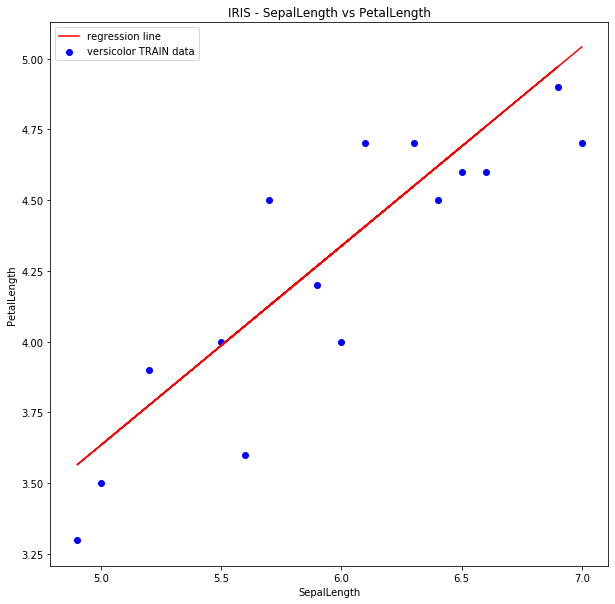

In [6]:
# regression_line
y_new = W[0]*x_train + W[1]

# Scatter plot the measurements
fig = plt.figure(figsize=(10,10))

plt.scatter(x_train,
            y_train,
            color = 'b',
            label = 'versicolor TRAIN data')

plt.plot(x_train,
         y_new,
         color = 'r',
         label = 'regression line')

plt.title('IRIS - SepalLength vs PetalLength')
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()

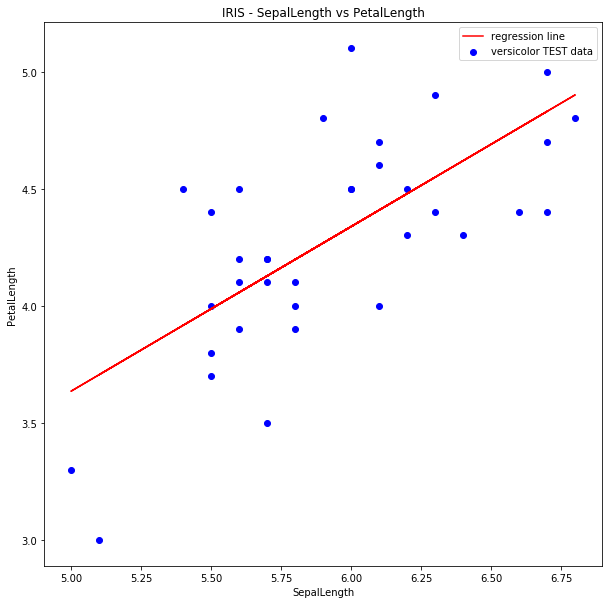

In [8]:
# regression_line
y_new = W[0]*x_test + W[1]

# Scatter plot the measurements
fig = plt.figure(figsize=(10,10))

plt.scatter(x_test,
            y_test,
            color = 'b',
            label = 'versicolor TEST data')

plt.plot(x_test,
         y_new,
         color = 'r',
         label = 'regression line')

plt.title('IRIS - SepalLength vs PetalLength')
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()

As we can see, the data used for testing can still plot a regression line for the remaining data points for the versicolor subset.

In [19]:
def cal_error(x,y,W):
    return 0.5*((W[0]*x + W[1]) - y)**2

def total_error(x,y,W):
    return sum(cal_error(x,y,W)) / len(x)

In [20]:
# Check total Error
total_error(x,y,W)

0.047259287535994385

In summary, with only a few training data points a linear relationship can be modeled between these 2 measurements of the IRIS data set. The total error is under 5% so we can be 95% confident that our linear relationship is accurate.